# importing labraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# importing & inspecting data

In [4]:
data=pd.read_csv('data/data.csv')
data.head(5)

,\tEmail,Address,Avatar,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank TunnelWrightmouth, MI 82180-9605",Violet,12.66,39.58,4.08,587.95
1,hduke@hotmail.com,"4547 Archer CommonDiazchester, CA 06566-8576",DarkGreen,11.11,37.27,2.66,392.20
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582Cobbborough, DC ...",Bisque,11.33,37.11,4.10,487.55
3,riverarebecca@gmail.com,"1414 David ThroughwayPort Jason, OH 22070-1220",SaddleBrown,13.72,36.72,3.12,581.85
4,mstephens@davidson-herman.com,"14023 Rodriguez PassagePort Jacobville, PR 372...",MediumAquaMarine,12.80,37.54,4.45,599.41


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   	Email                500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Time on App           500 non-null    float64
 4   Time on Website       500 non-null    float64
 5   Length of Membership  500 non-null    float64
 6   Yearly Amount Spent   500 non-null    float64
dtypes: float64(4), object(3)
memory usage: 27.5+ KB


In [6]:
data.describe().round(2)

,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.00,500.00,500.00,500.00
mean,12.05,37.06,3.53,499.31
std,0.99,1.01,1.00,79.31
min,8.51,33.91,0.27,256.67
25%,11.39,36.35,2.93,445.04
50%,11.98,37.07,3.54,498.89
75%,12.75,37.72,4.13,549.31
max,15.13,40.01,6.92,765.52


# exploring data

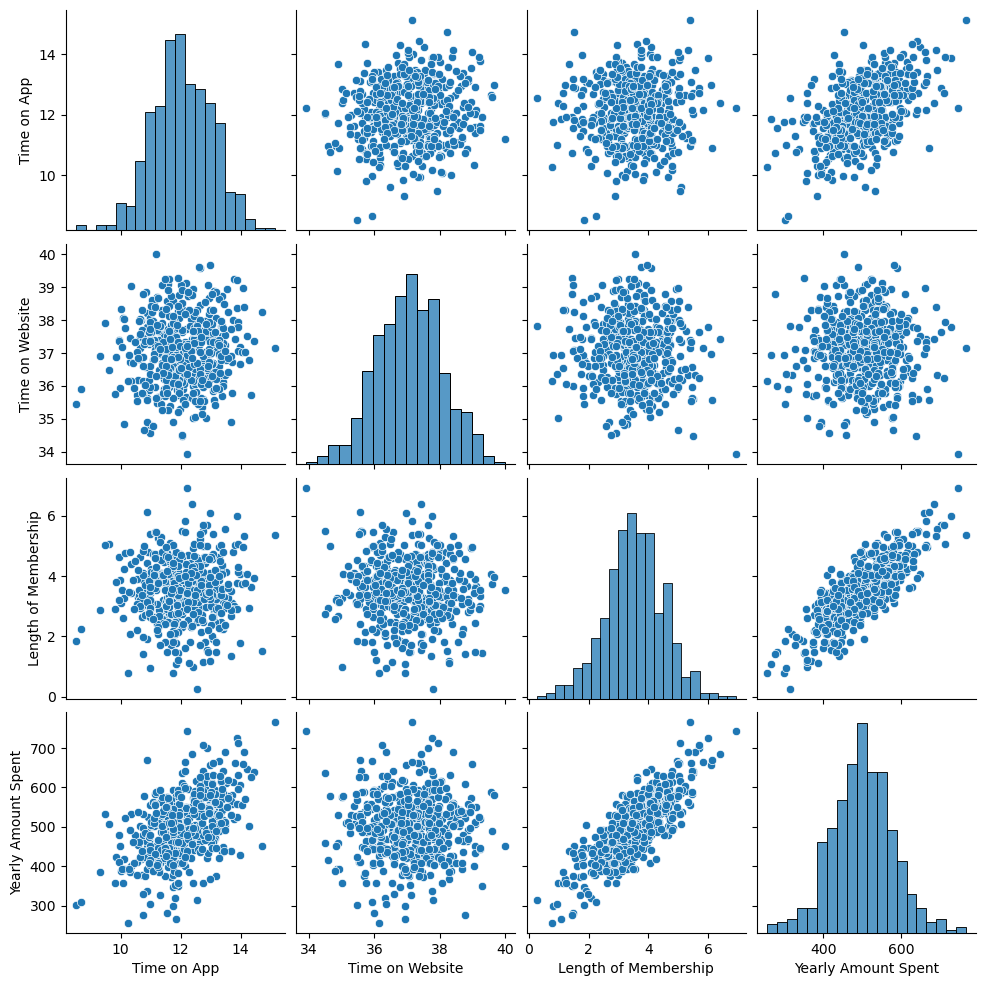

In [12]:
sns.pairplot(data)#it going to plot the relationships across the entire data frames numericalvalues
plt.show()

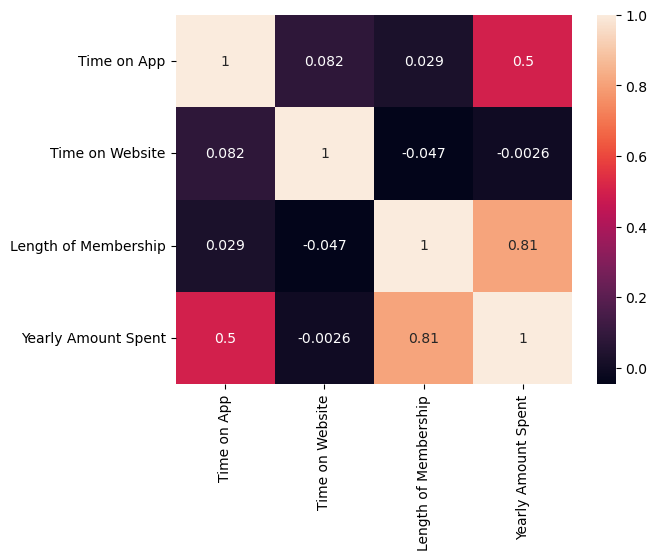

In [11]:
#to make it clear
sns.heatmap(data.corr(),annot=True)
plt.show()

In [14]:
#the correlation between Length of Membership and Yearly Amount Spent

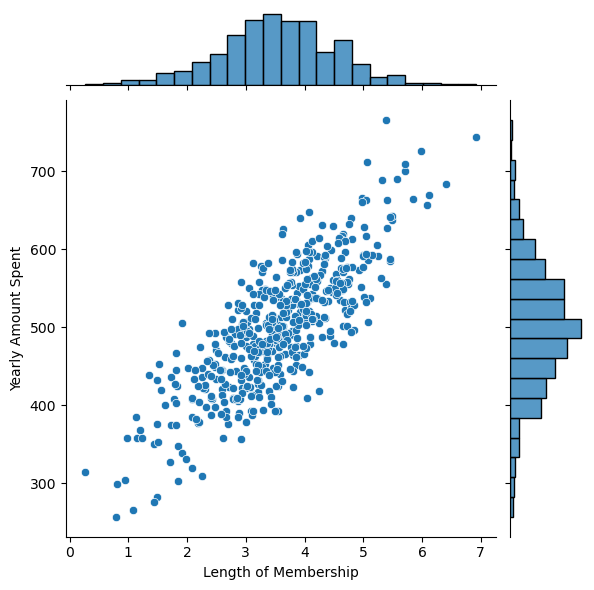

In [15]:
data.columns
sns.jointplot(data=data,x='Length of Membership',y='Yearly Amount Spent')
plt.show()

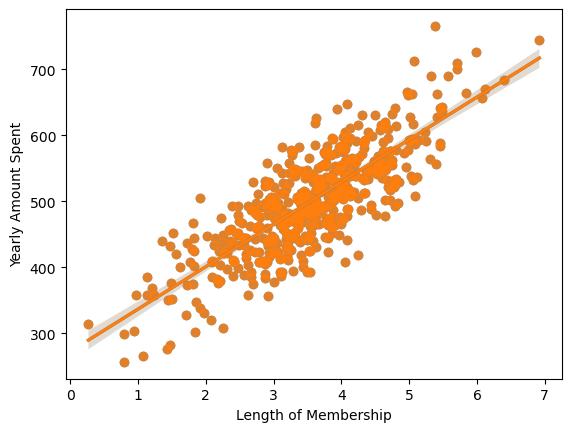

In [46]:
sns.regplot(data=data,x='Length of Membership',y='Yearly Amount Spent')
plt.show()

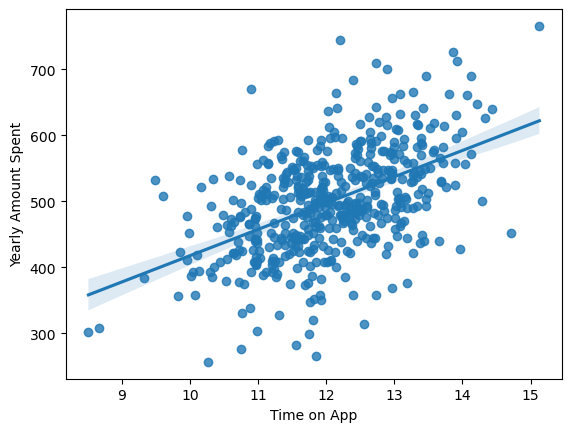

In [16]:
#the correlation between Time on App and Yearly Amount Spent
sns.regplot(data=data,x='Time on App',y='Yearly Amount Spent')
plt.show()

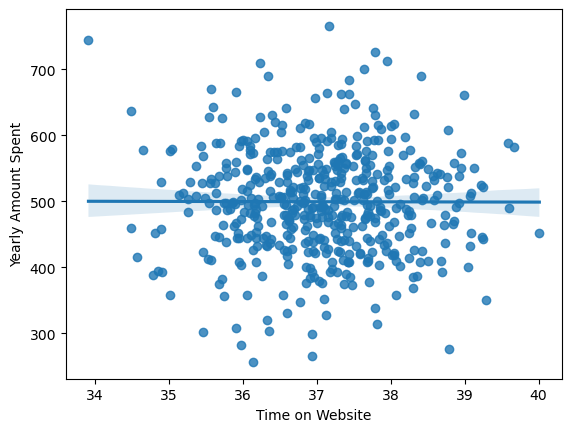

In [17]:
#the correlation between Time on Website and Yearly Amount Spent
sns.regplot(data=data,x='Time on Website',y='Yearly Amount Spent')
plt.show()#hada masalhch

In [18]:
y=data['Yearly Amount Spent']#output
x=data[['Time on App', 'Time on Website', 'Length of Membership']]#input

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [20]:
data.columns

Index(['\tEmail', 'Address', 'Avatar', 'Time on App', 'Time on Website',
       'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

# model building & training

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
model=LinearRegression()

In [23]:
model.fit(x_train,y_train)

LinearRegression()

# model prediction

In [24]:

model.predict([[13,30,6]])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([691.84985368])

In [26]:
y_pred=model.predict(x_test)
y_pred[:10]

array([508.19299606, 535.8346861 , 459.08156954, 454.27914846,
       612.38467992, 415.49415564, 490.26809201, 532.40529822,
       478.83664052, 596.87540773])

In [27]:
y_test.values[:10]

array([487.55, 523.63, 510.4 , 460.06, 640.19, 412.01, 443.97, 556.19,
       443.2 , 619.9 ])

# model evaluation

In [28]:
model.score(x_test,y_test)

0.880083246559908

In [29]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test,y_pred))

23.837482527601818


# coefficients & conclusion

In [62]:
model.coef_

array([37.99274285,  0.53471024, 62.76998035])

In [63]:
data.columns

Index(['\tEmail', 'Address', 'Avatar', 'Time on App', 'Time on Website',
       'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

Conclusion:y(Yearly Amount Spent)=37.99274285 * x1(app) + 0.53471024 * x2(website)+62.76998035* x3
So, based on the analysis, it appears that the application has a greater impact on the revenue compared to the website